In [1]:
#Import necessary py libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check working directory/ set working directory/ set input folder path

path = os.getcwd()
print("Current working directory is set as:", path)
file_path = path+'\\input'
print("Input files are under the folder:", file_path)

#List files under input folder
os.listdir(file_path)

Current working directory is set as: P:\IT\Kaggle\gomti_river
Input files are under the folder: P:\IT\Kaggle\gomti_river\input


['Gomti_Morphometry_23_Dec_2023.csv']

In [3]:
# Read the input files

df = pd.read_csv(file_path+'\\Gomti_Morphometry_23_Dec_2023.csv',index_col=False)

In [4]:
df.head()

,SB,Lb,L avg.,Rb,Rl,A,Dd,Fs,Rt,Re,Ff,Rc,Lg,In,R,RR,Rn,HI,S
0,SB1,9.59,0.373,3.717,2.046,32.32,3.19,8.54,8.23,0.669,0.351,0.361,0.157,27.21,1106,0.115,3.524,0.438,44.51
1,SB2,10.96,0.385,4.499,2.375,37.30,3.29,8.55,9.21,0.629,0.310,0.390,0.152,28.18,1109,0.101,3.654,0.406,41.91
2,SB3,15.63,0.427,4.154,2.023,44.50,3.40,7.98,8.12,0.482,0.182,0.292,0.147,27.15,1178,0.075,4.010,0.350,34.26
3,SB4,9.69,0.488,4.333,2.347,14.47,3.20,6.57,3.83,0.443,0.154,0.296,0.156,21.01,671,0.069,2.148,0.271,29.46
4,SB5,14.94,0.408,2.871,1.762,46.72,3.34,8.18,6.26,0.516,0.209,0.157,0.150,27.31,1475,0.099,4.926,0.273,34.77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SB      13 non-null     object 
 1   Lb      13 non-null     float64
 2   L avg.  13 non-null     float64
 3   Rb      13 non-null     float64
 4   Rl      13 non-null     float64
 5   A       13 non-null     float64
 6   Dd      13 non-null     float64
 7   Fs      13 non-null     float64
 8   Rt      13 non-null     float64
 9   Re      13 non-null     float64
 10  Ff      13 non-null     float64
 11  Rc      13 non-null     float64
 12  Lg      13 non-null     float64
 13  In      13 non-null     float64
 14  R       13 non-null     int64  
 15  RR      13 non-null     float64
 16  Rn      13 non-null     float64
 17  HI      13 non-null     float64
 18  S       13 non-null     float64
dtypes: float64(17), int64(1), object(1)
memory usage: 2.1+ KB


In [6]:
# import sweetviz as sv

# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [6]:
train = df.drop(['SB'], axis=1)
train.head()

,Lb,L avg.,Rb,Rl,A,Dd,Fs,Rt,Re,Ff,Rc,Lg,In,R,RR,Rn,HI,S
0,9.59,0.373,3.717,2.046,32.32,3.19,8.54,8.23,0.669,0.351,0.361,0.157,27.21,1106,0.115,3.524,0.438,44.51
1,10.96,0.385,4.499,2.375,37.30,3.29,8.55,9.21,0.629,0.310,0.390,0.152,28.18,1109,0.101,3.654,0.406,41.91
2,15.63,0.427,4.154,2.023,44.50,3.40,7.98,8.12,0.482,0.182,0.292,0.147,27.15,1178,0.075,4.010,0.350,34.26
3,9.69,0.488,4.333,2.347,14.47,3.20,6.57,3.83,0.443,0.154,0.296,0.156,21.01,671,0.069,2.148,0.271,29.46
4,14.94,0.408,2.871,1.762,46.72,3.34,8.18,6.26,0.516,0.209,0.157,0.150,27.31,1475,0.099,4.926,0.273,34.77


### Weights by using CRITIC method

In [14]:
#Function to calculate weights

def calculate_criteria_importance(matrix):
  """Calculates the importance of criteria using the Criteria Importance Through Intercriteria Correlation (CRITIC) method.

  Args:
    matrix: A decision matrix with criteria in the rows and alternatives in the columns.

  Returns:
    A vector of criteria importance weights.
  """

  # Calculate the criteria correlation matrix.
  correlation_matrix = np.corrcoef(matrix)

  # Calculate the criteria standard deviations.
  standard_deviations = np.std(matrix, axis=1)

  # Calculate the criteria importance weights.
  weights = np.sum(correlation_matrix * standard_deviations, axis=1)

  # Normalize the weights so that they sum to 1.
  weights /= np.sum(weights)

  return weights

In [7]:
#Using crispyn library
#https://pypi.org/project/crispyn/
#https://www.sciencedirect.com/search?qs=critic_weighting

import numpy as np
from crispyn.mcda_methods import VIKOR
from crispyn import weighting_methods as mcda_weights
from crispyn import normalizations as norms
from crispyn.additions import rank_preferences

In [8]:
alter = df['SB'].to_numpy()
alter

array(['SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'SB6', 'SB7', 'SB8', 'SB9',
       'SB10', 'SB11', 'SB12', 'SB13'], dtype=object)

In [9]:
features = (train.columns.to_numpy())
features

array(['Lb', 'L avg.', 'Rb', 'Rl', 'A', 'Dd', 'Fs', 'Rt', 'Re', 'Ff',
       'Rc', 'Lg', 'In', 'R', 'RR', 'Rn', 'HI', 'S'], dtype=object)

In [10]:
print(features)

['Lb' 'L avg.' 'Rb' 'Rl' 'A' 'Dd' 'Fs' 'Rt' 'Re' 'Ff' 'Rc' 'Lg' 'In' 'R'
 'RR' 'Rn' 'HI' 'S']


In [11]:
mat = train.to_numpy()
print(mat)

[[9.590e+00 3.730e-01 3.717e+00 2.046e+00 3.232e+01 3.190e+00 8.540e+00
  8.230e+00 6.690e-01 3.510e-01 3.610e-01 1.570e-01 2.721e+01 1.106e+03
  1.150e-01 3.524e+00 4.380e-01 4.451e+01]
 [1.096e+01 3.850e-01 4.499e+00 2.375e+00 3.730e+01 3.290e+00 8.550e+00
  9.210e+00 6.290e-01 3.100e-01 3.900e-01 1.520e-01 2.818e+01 1.109e+03
  1.010e-01 3.654e+00 4.060e-01 4.191e+01]
 [1.563e+01 4.270e-01 4.154e+00 2.023e+00 4.450e+01 3.400e+00 7.980e+00
  8.120e+00 4.820e-01 1.820e-01 2.920e-01 1.470e-01 2.715e+01 1.178e+03
  7.500e-02 4.010e+00 3.500e-01 3.426e+01]
 [9.690e+00 4.880e-01 4.333e+00 2.347e+00 1.447e+01 3.200e+00 6.570e+00
  3.830e+00 4.430e-01 1.540e-01 2.960e-01 1.560e-01 2.101e+01 6.710e+02
  6.900e-02 2.148e+00 2.710e-01 2.946e+01]
 [1.494e+01 4.080e-01 2.871e+00 1.762e+00 4.672e+01 3.340e+00 8.180e+00
  6.260e+00 5.160e-01 2.090e-01 1.570e-01 1.500e-01 2.731e+01 1.475e+03
  9.900e-02 4.926e+00 2.730e-01 3.477e+01]
 [1.046e+01 3.760e-01 3.908e+00 2.083e+00 3.042e+01 3.140e+00 8.3

In [12]:
#Initialize a DF to store weights calculated using various techniques

wdf = pd.DataFrame(columns=features)
wdf.insert(0, "W_method",[])
print(wdf)

Empty DataFrame
Columns: [W_method, Lb, L avg., Rb, Rl, A, Dd, Fs, Rt, Re, Ff, Rc, Lg, In, R, RR, Rn, HI, S]
Index: []


In [48]:
# #Based on function
# wt_fun = calculate_criteria_importance(mat)

# #---------------------- Save the method and results to wdf --------------------------------------
# my_list = ["wt_fun"]
# my_list.extend(wt_fun)

# wdf.loc[len(wdf)] = my_list
# wdf.head()

#print(my_list)

['wt_fun', 0.07692630031110961, 0.0769250648560987, 0.07691893903519288, 0.07692166268636254, 0.07691822059818403, 0.0769260013557528, 0.0769234214249206, 0.07692534621885935, 0.07692403930987936, 0.076924175137105, 0.07691786592899613, 0.07692493736120896, 0.07692402577633009]


In [13]:
#Different weights based on crispyn

#Entropy

entropy = mcda_weights.entropy_weighting(mat)

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["entropy"]
my_list.extend(entropy)

wdf.loc[len(wdf)] = my_list
#wdf.head()
#print(my_list)

In [14]:
#Different weights based on crispyn

#Equal

equal = mcda_weights.equal_weighting(mat)
#equal

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["equal"]
my_list.extend(equal)

wdf.loc[len(wdf)] = my_list
#wdf.head()

In [15]:
#Different weights based on crispyn

#Standard Devialtion

std = mcda_weights.std_weighting(mat)
#std

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["Standard_Dev"]
my_list.extend(std)

wdf.loc[len(wdf)] = my_list

In [16]:
#Different weights based on crispyn

#CRITIC

crit = mcda_weights.critic_weighting(mat)
crit

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["CRITIC"]
my_list.extend(crit)

wdf.loc[len(wdf)] = my_list

In [17]:
#Different weights based on crispyn

#Gini coefficient-based

gin = mcda_weights.gini_weighting(mat)
gin

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["Gini_coef"]
my_list.extend(gin)

wdf.loc[len(wdf)] = my_list

In [18]:
#Different weights based on crispyn

#MEREC
#Merec method requires type (Influence positive or negative)
#Assumption that: Increasing the value Lg typically shall result in greater runoff and soil erosion from the respective sub-watershed, etc. Hence, sub-watershed with lower Lg value should be given higher priority and vice-versa.
 
types = np.array([1, 1, 1, 1, 1, 1, 1,1,1,1,1,-1,1,1,1,1,1,1])

mer = mcda_weights.merec_weighting(mat, types)
mer

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["MEREC"]
my_list.extend(mer)

wdf.loc[len(wdf)] = my_list

In [19]:
#Different weights based on crispyn

#Statistical variance

svar = mcda_weights.stat_var_weighting(mat)
svar

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["Statistical_variance"]
my_list.extend(svar)

wdf.loc[len(wdf)] = my_list

In [20]:
#Different weights based on crispyn

#CILOS
# Requires "Types" parameter

cil = mcda_weights.cilos_weighting(mat, types)
cil

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["CILOS"]
my_list.extend(cil)

wdf.loc[len(wdf)] = my_list

In [21]:
#Different weights based on crispyn

#IDOCRIW
# Requires "Types" parameter

ido = mcda_weights.idocriw_weighting(mat, types)
ido

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["IDOCRIW"]
my_list.extend(ido)

wdf.loc[len(wdf)] = my_list

In [22]:
#Different weights based on crispyn

#Angle
# Requires "Types" parameter

ang = mcda_weights.angle_weighting(mat, types)
ang

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["Angle"]
my_list.extend(ang)

wdf.loc[len(wdf)] = my_list

In [23]:
#Different weights based on crispyn

#Coefficient of variation

cov = mcda_weights.coeff_var_weighting(mat)
cov

# #---------------------- Save the method and results to wdf --------------------------------------
my_list = ["CoV"]
my_list.extend(cov)

wdf.loc[len(wdf)] = my_list

In [24]:
wdf.head(11)

,W_method,Lb,L avg.,Rb,Rl,A,Dd,Fs,Rt,Re,Ff,Rc,Lg,In,R,RR,Rn,HI,S
0,entropy,0.077536,0.009993,0.081475,0.023086,0.194275,0.003722,0.007236,0.068204,0.028327,0.107551,0.084653,0.003842,0.013033,0.055847,0.083395,0.053526,0.057344,0.046955
1,equal,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
2,Standard_Dev,0.010848,0.000144,0.003411,0.001050,0.043856,0.000697,0.002363,0.006038,0.000325,0.000279,0.000312,0.000033,0.010400,0.886709,0.000105,0.002853,0.000317,0.030258
3,CRITIC,0.069455,0.079098,0.069845,0.061986,0.055766,0.054823,0.043582,0.040001,0.054860,0.054803,0.049745,0.057618,0.052360,0.045219,0.050024,0.041775,0.060511,0.058529
4,Gini_coef,0.071766,0.025342,0.074887,0.040997,0.117617,0.015896,0.019231,0.068337,0.045288,0.087950,0.074534,0.016195,0.026222,0.060484,0.075581,0.058371,0.062235,0.059067
5,MEREC,0.052087,0.013426,0.062371,0.035185,0.115441,0.018392,0.032939,0.085455,0.036377,0.073132,0.108195,0.018202,0.036875,0.074498,0.060306,0.078314,0.052987,0.045817
6,Statistical_variance,0.063620,0.053715,0.082723,0.058541,0.058112,0.041870,0.047829,0.043150,0.067182,0.066201,0.045042,0.042193,0.058760,0.041662,0.047932,0.036131,0.078184,0.067153
7,CILOS,0.024881,0.086620,0.026061,0.031597,0.024764,0.110816,0.194489,0.023583,0.044545,0.025127,0.029833,0.111052,0.110556,0.030332,0.018432,0.029825,0.034280,0.043207
8,IDOCRIW,0.062098,0.027863,0.068349,0.023480,0.154861,0.013275,0.045300,0.051776,0.040617,0.086990,0.081294,0.013735,0.046383,0.054527,0.049481,0.051388,0.063278,0.065305
9,Angle,0.075075,0.027065,0.073400,0.040448,0.112512,0.016201,0.022195,0.067570,0.044348,0.084593,0.073964,0.016116,0.029711,0.061232,0.076229,0.060174,0.061946,0.057222


In [62]:
import sweetviz as sv

wt_report = sv.analyze(wdf)
wt_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
#Export the WDF to excel
file_name = 'Param_weights_multi_methods_02Jan24.xlsx'
 
# saving the excel
wdf.to_excel(file_name)

In [21]:
#Influence positive or negative
types = np.array([1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1])
# Create the VIKOR method object
vikor = VIKOR(normalization_method=norms.minmax_normalization)
# Calculate alternatives preference function values with VIKOR method
pref = vikor(mat, weights, types)
# Rank alternatives according to preference values
rank = rank_preferences(pref, reverse = False)

In [22]:
rank

array([ 2,  1,  4, 13,  5,  3,  7, 11,  6,  8, 12,  9, 10])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [27]:
# Metrices for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  precision_score, recall_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, auc, mean_squared_error

In [18]:
help(LinearSVR)

Help on class LinearSVR in module sklearn.svm._classes:

class LinearSVR(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  LinearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual='warn', verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Regression.
 |  
 |  Similar to SVR with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  .. versionadded:: 0.16
 |  
 |  Parameters
 |  ----------
 |  epsilon : float, default=0.0
 |      Epsilon parameter in the epsilon-insensitive loss function. Note
 |      that the value of this parameter depends on the scale of the target
 |      variable

In [20]:
#Identify X and y
X = train.drop("Lb", axis=1)
y = train["Lb"]

In [23]:
#Create train/ test split

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.3, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = LinearSVR().fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test,y_pred))

[9.43677681 8.59009711 9.06080935 9.7874969 ]
6.190861568753354


AttributeError: module 'matplotlib' has no attribute 'title'

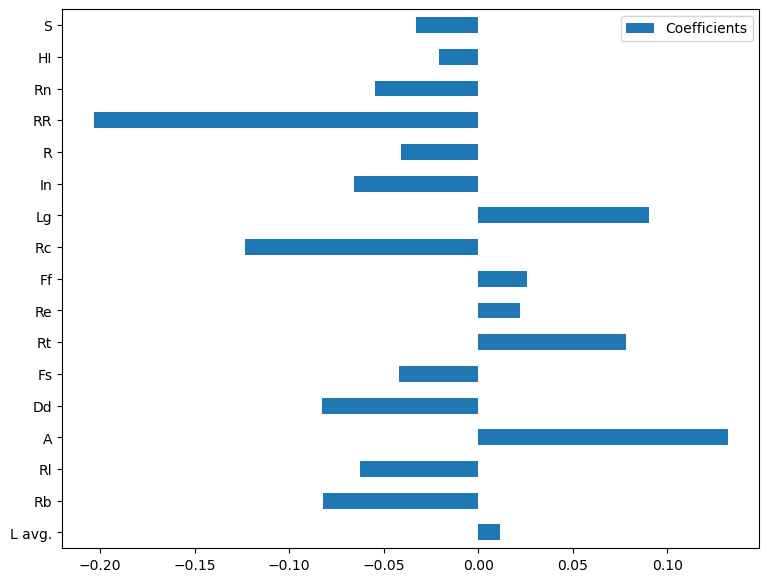

In [33]:
coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("LinearSVR model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.

In [32]:
X

,L avg.,Rb,Rl,A,Dd,Fs,Rt,Re,Ff,Rc,Lg,In,R,RR,Rn,HI,S
0,0.373,3.717,2.046,32.32,3.19,8.54,8.23,0.669,0.351,0.361,0.157,27.21,1106,0.115,3.524,0.438,44.51
1,0.385,4.499,2.375,37.30,3.29,8.55,9.21,0.629,0.310,0.390,0.152,28.18,1109,0.101,3.654,0.406,41.91
2,0.427,4.154,2.023,44.50,3.40,7.98,8.12,0.482,0.182,0.292,0.147,27.15,1178,0.075,4.010,0.350,34.26
3,0.488,4.333,2.347,14.47,3.20,6.57,3.83,0.443,0.154,0.296,0.156,21.01,671,0.069,2.148,0.271,29.46
4,0.408,2.871,1.762,46.72,3.34,8.18,6.26,0.516,0.209,0.157,0.150,27.31,1475,0.099,4.926,0.273,34.77
5,0.376,3.908,2.083,30.42,3.14,8.35,7.25,0.595,0.278,0.311,0.159,26.21,1250,0.119,3.924,0.438,50.24
6,0.396,3.648,1.905,26.10,3.39,8.55,7.34,0.588,0.272,0.356,0.148,28.95,903,0.092,3.059,0.481,39.52
7,0.414,2.324,1.572,24.15,3.41,8.24,5.92,0.606,0.289,0.269,0.146,28.14,1045,0.114,3.568,0.281,32.45
8,0.381,2.304,1.789,28.77,2.92,7.65,6.70,0.595,0.278,0.335,0.171,22.30,1195,0.118,3.484,0.404,51.07
9,0.450,3.499,1.764,23.18,3.55,7.89,7.02,0.634,0.315,0.429,0.141,28.02,839,0.098,2.979,0.433,32.15
